In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from dynamic_tasker.schedulers import *
plt.style.use(['science', 'grid'])

%load_ext autoreload
%autoreload 2

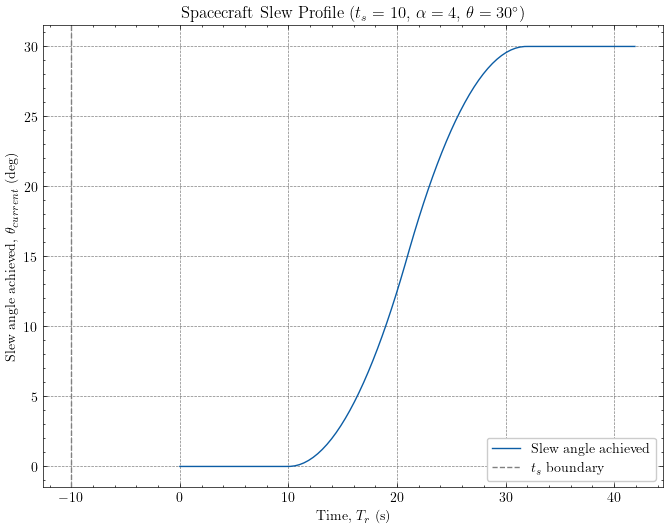

In [47]:
# Parameters
ts = 10         # Settling time in seconds
alpha = 4       # Given constant
theta = 30      # Target slew angle in degrees

# Total time for the maneuver (bang-bang portion + settling)
T_total = alpha * np.sqrt(theta) + ts

agility = lambda x: ts + alpha * np.sqrt(x)

# Create an array of times until the next task T_r (from 0 to T_total)
T_r = np.linspace(0, T_total + 10, 100)
# Compute elapsed time since the start of the maneuver
tau = T_total - T_r

# Initialize the current slew angle array
theta_current = np.zeros_like(tau)

# Define the threshold: end of the bang-bang maneuver
tau_threshold = alpha * np.sqrt(theta)

# Compute theta_current for each T_r
t_next = T_r[-1]

for i, t in enumerate(T_r):
    theta_current[i] = slew_angle(t, t_next, 0, 30, agility)
    # if t > tau_threshold:
    #     # Settling phase: slew is complete
    #     theta_current[i] = theta
    # else:
    #     # Bang-bang phase
    #     x = t / tau_threshold  # Normalized time (0 <= x <= 1)
    #     if x <= 0.5:
    #         # Acceleration phase
    #         theta_current[i] = 2 * theta * x**2
    #     else:
    #         # Deceleration phase
    #         theta_current[i] = theta * (1 - 2 * (1 - x)**2)

# Plotting the slew profile
plt.figure(figsize=(8, 6))
plt.plot(T_r, theta_current, label='Slew angle achieved')
plt.xlabel('Time, $T_r$ (s)')
plt.ylabel('Slew angle achieved, $\\theta_{current}$ (deg)')
plt.title('Spacecraft Slew Profile ($t_s=10$, $\\alpha=4$, $\\theta=30^\\circ$)')
plt.axvline(x=-ts, color='gray', linestyle='--', label='$t_s$ boundary')
# plt.xlim(-T_total, 0)
plt.legend()
plt.grid(True)
plt.show()
